<a href="https://colab.research.google.com/github/gonzalowho/DataScience/blob/master/Diccionario_%2B_Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Ejercitación para el Lunes 18**

In [2]:
import json
from datetime import datetime

Crear una función que permita la carga de pedidos y los guarde en un archivo (Utilizar manejo de excepciones)

In [3]:
def cargar_pedidos_existentes(filename):
  lista_old_pedidos={}
  try:
    with open(filename, 'r') as f:
      pedidos_json = json.load(f)
      lista_old_pedidos = pedidos_json
  except IOError:
    print("El archivo no existe. Se creara uno nuevo")
  return lista_old_pedidos

def carga_pedidos(filename_pedidos, filename_clientes):
  pedidos_existentes = cargar_pedidos_existentes(filename_pedidos)
  dict_pedidos={}
  id = CreateId(filename_pedidos)
  with open(filename_clientes, 'r') as f:
    data = json.load(f)
  listaidClientes = list(data.keys())
  print("----------Lista IDs Clientes----------") 
  for i in  listaidClientes:
     print(i)
  print("--------------------------------------\n")
  idcliente = input("Copie el idCliente deseado: ")
  if idcliente in listaidClientes:
    producto = input("Ingrese el producto: ")
    cantidad = input("Ingrese la cantidad: ")
    dict_pedidos[id]={'idCliente': idcliente , 'Producto': producto, 'Cantidad': cantidad}
  else:
    print("Id de cliente inexistente")
  for k, v in dict_pedidos.items():
    pedidos_existentes[k] = v
  #print(pedidos_existentes)
  return pedidos_existentes
      

def cargar_pedidos_main(filename_pedidos,filename_clientes):
  while True: 
    funciones_varias = input('¿Qué quiere hacer?:\n A: Agregar pedido /  Salir: Para salir ').title()
    if funciones_varias == 'A':
      dict_pedidos = carga_pedidos(filename_pedidos,filename_clientes)
    if funciones_varias == 'Salir':
      print("Muchas gracias, vuelva prontos")
      break    

    with open(filename_pedidos, 'w') as f:
      json.dump(dict_pedidos, f, indent=4)      
  return    

Crear una función que imprima por pantalla el listado de clientes.

In [4]:
def leer_clientes():
  data={}
  try:
    with open('/content/sample_data/clientes.json', 'r') as f:
      data = json.load(f)
    print(data)
  except IOError:
    print("no existe el archivo clientes")
  return data


In [24]:
#Versión con validación del cuit

#import json
#from datetime import datetime


#Función que carga clientes existentes en un diccionario y se que exista el archivo. Requiere parámetro filname con la ruta del archivo clientes.
def cargar_clientes_existentes(filename):
  lista_old_cli={}
  try:
    with open(filename, 'r') as f:
      clientes_json = json.load(f)
      lista_old_cli = clientes_json
  except IOError:
    print("El archivo no existe. Se creara uno nuevo")
  return lista_old_cli

#Función que guarda los clientes el archivo. Se sobrescribe con el diccionario que contiene los clientes existentes anteriormente más el cargado en la transacción actual.
def guardar_clientes(lista_clientes, filename):
  with open(filename, 'w') as f:
    json.dump(lista_clientes, f, indent=4) 
  return

#Funcion que valida cuit ya existentes.
#
def validar_cliente(cuit, clientes_existentes):
    cuits = [] #creo lista vacía y se agregan todos los cuits
    for key, value in clientes_existentes.items():
      cuits.append(value.get("Cuit"))
    if cuit in cuits: #se valida si el cuit ingreado existe en la lista
        cuit = validar_cliente(input("Ya existe el Cuit. Intente nuevamente: "),clientes_existentes) #Se llama al a misma función recursivamente hasta que se ingrese un cuit que no exista.

    return cuit    
        
def CreateId(filename):
  listid = cargar_clientes_existentes(filename)
  if len(listid) != 0 :
    maxId = max(cargar_clientes_existentes(filename))
  else:
    maxId =0
  #now = datetime.now()
  #id = int(now.strftime("%d%m%y%H%M%S"))
  id = int(maxId) + 1
  return id


def carga_cliente(filename_clientes):
  id = CreateId(filename_clientes)
  clientes_existentes = cargar_clientes_existentes(filename_clientes)
  dict_clientes = {}
  #now = datetime.now()
  #fecha = now.strftime("%d%m%y%H%M%S")
  rsoc = input("Ingrese la razón social: ")
  #cuit = input("Ingrese el cuit sin guiones ni puntos: ")
  cuit = validar_cliente(input("cuit :"), clientes_existentes) #Se modifica para utilizar la función validar_cliente que toma como parámetro el input de cuit de consola y diccionario de clientes existentes.
  direccion = input("Ingrese su dirección: ")
  dict_clientes[id]={'Razon_social': rsoc , 'Cuit': cuit, 'Direccion': direccion}
  
  for k, v in dict_clientes.items():
    clientes_existentes[k] = v
  return clientes_existentes

def carga_cliente_main(filename_clientes):
  while True: 
    funciones_varias = input('¿Qué quiere hacer?:\n A: Agregar cliente /  Salir: Para salir ').title()
    if funciones_varias == 'A':
      dict_clientes = carga_cliente(filename_clientes)
      guardar_clientes(dict_clientes,filename_clientes)


    if funciones_varias == 'Salir':
      print("Muchas gracias, vuelva prontos")

      break    




In [21]:
def leer_clientes(filename):
  data={}
  try:
    with open(filename, 'r') as f:
      data = json.load(f)
      for key, values in data.items():
        print(f"Cliente id: {key}" )
        for k in values: 
          print(k + ":" , values[k]) 
  except IOError:
    print("no existe el archivo")


def leer_pedidos(filename):
  try:
    with open(filename, 'r') as f:
      data = json.load(f)
      for key, values in data.items():
        print(f"Pedido id: {key}" )
        for k in values: 
          print(k + ":" , values[k]) 
  except IOError:
    print("no existe el archivo")


def MostrarPedidos():
  flag = False
  with open(filename_clientes, 'r') as f:
    data = json.load(f)
  listaidClientes = list(data.keys())
  print("----------Lista IDs Clientes----------") 
  for i in  listaidClientes:
    print(i)

  idcliente = input("Copie el idCliente deseado: ")
  if idcliente in listaidClientes:
    try:
      with open(filename_pedidos, 'r') as f:
        data2 = json.load(f)
        for key, values in data2.items():
            for k in values: 
              if values[k] == idcliente:
                flag = True
                print(f"Pedido id: {key}" )
                for j in values:
                  if values[j] != idcliente:                
                    print(j + ":" , values[j])

      if not flag:
        print("No existen pedidos para el cliente")            
        
    except IOError:
      print("No existe el archivo")

  else:
    print("Id de cliente inexistente")
  



In [40]:
def realizar_operaciones(a):
    while a==0 or a>5:
        a= int(input("Ingrese un valor de menú válido:"))
    if a == 1:
        carga_cliente_main(filename_clientes)
    elif a == 2:
        cargar_pedidos_main(filename_pedidos,filename_clientes)
    elif a == 3:
        leer_clientes(filename_clientes)
    elif a == 4:
        leer_pedidos(filename_pedidos)
    else:
        MostrarPedidos()


#Se define path de file pedidos.json
filename_pedidos ='/content/sample_data/pedidos.json'
#Se define path de file clientes.json
filename_clientes = './sample_data/clientes.json'


operacion= int(input("MENU  \n 1)Cargar Cliente \n 2)Cargar pedido \n 3)Ver listado clientes \n 4)Ver listado pedidos \n 5)Ver cliente \n \nElija las siguiente operacion que quiere realizar:"))
realizar_operaciones(operacion)


MENU  
 1)Cargar Cliente 
 2)Cargar pedido 
 3)Ver listado clientes 
 4)Ver listado pedidos 
 5)Ver cliente 
 
Elija las siguiente operacion que quiere realizar:2
¿Qué quiere hacer?:
 A: Agregar pedido /  Salir: Para salir A
----------Lista IDs Clientes----------
1
2
--------------------------------------

Copie el idCliente deseado: 1
Ingrese el producto: Banana
Ingrese la cantidad: 1
¿Qué quiere hacer?:
 A: Agregar pedido /  Salir: Para salir Salir
Muchas gracias, vuelva prontos


In [28]:
with open('/content/sample_data/pedidos.json') as f_in:
  pedidos = json.load(f_in)

In [29]:
productos = {}

for x in pedidos.keys():
  if pedidos[x]['Producto'] not in productos:
    productos[pedidos[x]['Producto']] = int(pedidos[x]['Cantidad'])
  else:
    productos[pedidos[x]['Producto']] = productos[pedidos[x]['Producto']] + int(pedidos[x]['Cantidad'])

In [30]:
productos

{'BAnana': 8, 'Manzana': 23}

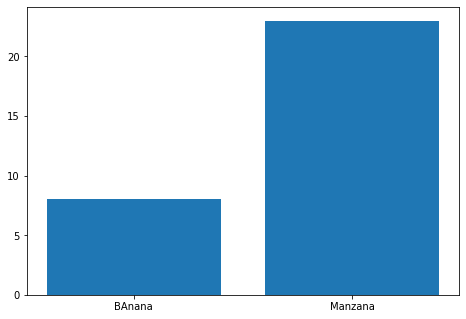

In [31]:
import matplotlib.pyplot as plt

prod = productos.keys()
cant = productos.values()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(prod,cant)
plt.show()

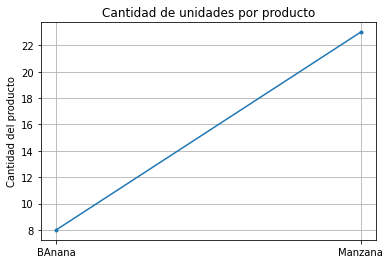

In [32]:
prod = list(productos.keys())
cant = list(productos.values())
  
plt.plot(prod, cant,marker=".")
plt.title('Cantidad de unidades por producto')
plt.ylabel('Cantidad del producto')
plt.grid()
plt.show()

In [38]:
import pandas as pd
df = pd.read_json(filename_clientes)

In [39]:
df.transpose()

,Razon_social,Cuit,Direccion
1978-04-03 03:30:14.418,Ivana SA,27374323879,Av. sarasa
1978-04-03 03:30:14.442,Gonzalo SRL,123456789,Calle falsa 123
